# Sales Prediction (Simple Linear Regression)

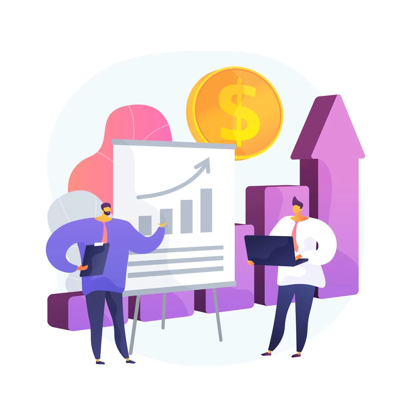

<p>
<b>Problem Statement</b>

- Build a simple linear regression model which predicts sales based on the money spent on different platforms for marketing.
  
<b>Data</b>

- Use the advertising dataset and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable</P>

In [4]:
#import libraries
import numpy as np #linear algebra
import pandas as pd #DataFrames

#Data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### Importing Dataset

In [10]:
data=pd.read_csv('advertising.xls')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Exploratory Data Analysis (EDA)

In [17]:
data.shape

(200, 4)

In [19]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [21]:
#the description of data
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.04,85.85,0.7,74.38,149.75,218.82,296.4
Radio,200.0,23.26,14.85,0.0,9.98,22.90,36.52,49.6
Newspaper,200.0,30.55,21.78,0.3,12.75,25.75,45.10,114.0
Sales,200.0,15.13,5.28,1.6,11.00,16.00,19.05,27.0


In [23]:
#more informations about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [25]:
#checking missing values
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [27]:
#check for duplication
data.loc[data.duplicated()]

,TV,Radio,Newspaper,Sales


- #### Data Visualization

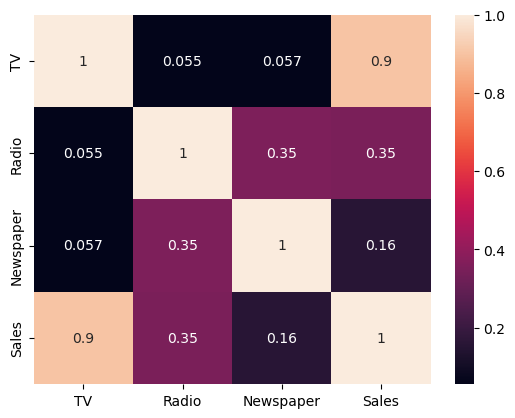

In [104]:
sns.heatmap(data.corr(), annot= True)
plt.show()

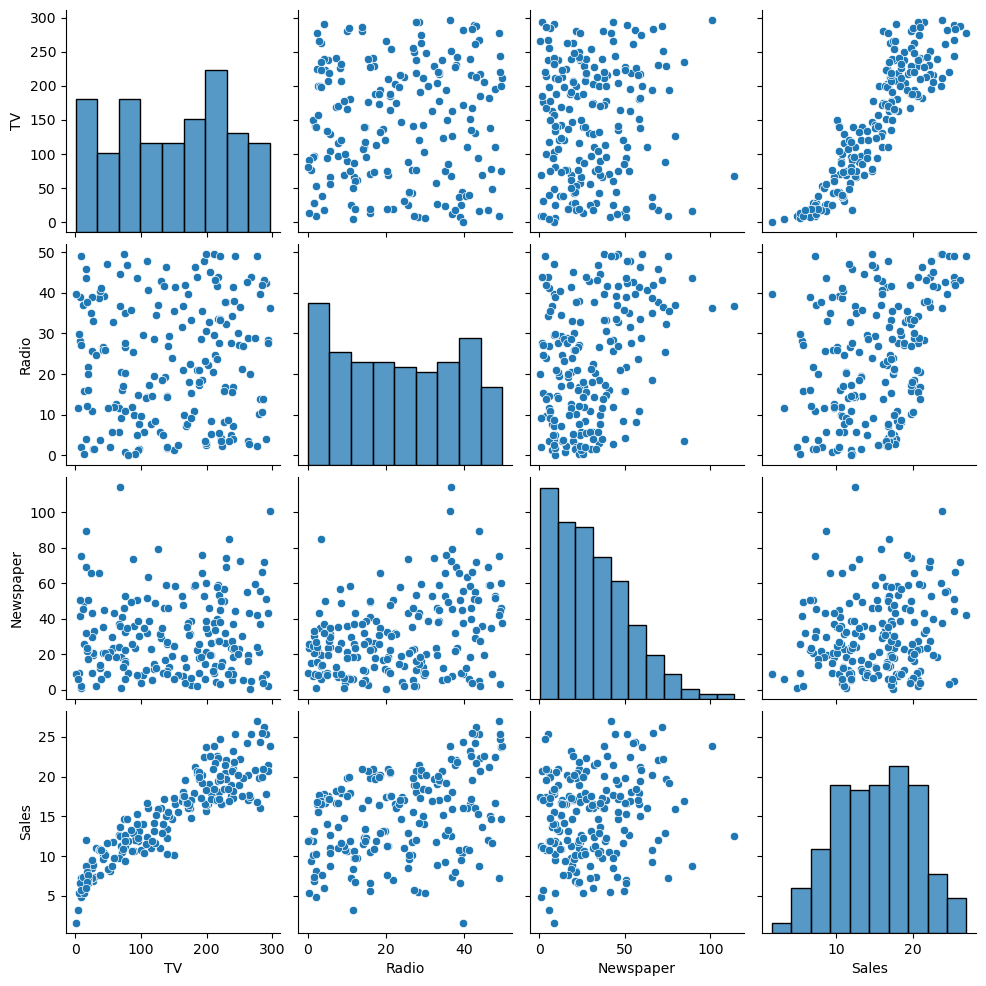

In [36]:
sns.pairplot(data)
plt.show()

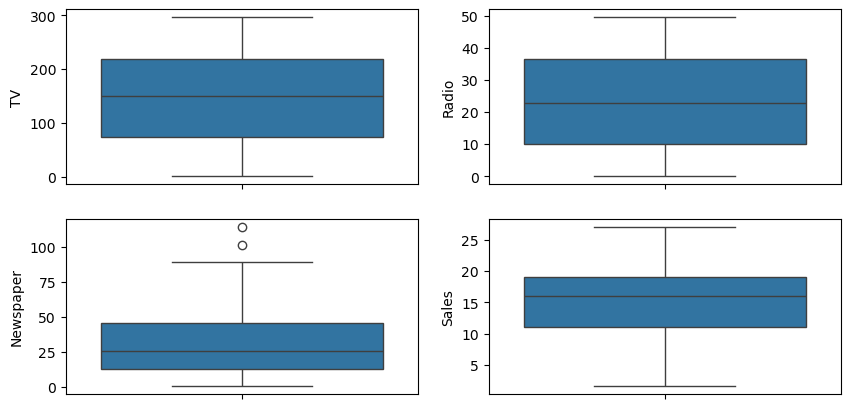

In [70]:
#check for Outliers
fig,axs=plt.subplots(ncols=2,nrows=2,figsize=(10,5))
index=0

axs=axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k,data=data,ax=axs[index])
    index+=1
plt.show()

In [77]:
for k,v in data.items():
    q1=v.quantile(0.25)
    q3=v.quantile(0.75)
    iqr=q3-q1
    v_col=v[(v<q1-1.5*iqr) | (v>q3+1.5*iqr)]
    percentage=(v_col.shape[0]/data.shape[0])*100
    print(f'Column {k} outliers= {percentage}%')

Column TV outliers= 0.0%
Column Radio outliers= 0.0%
Column Newspaper outliers= 1.0%
Column Sales outliers= 0.0%


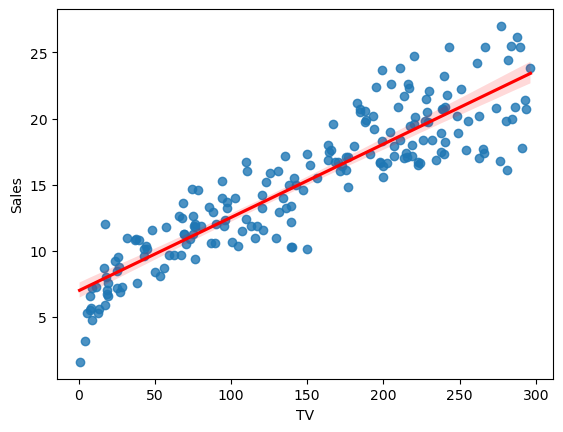

In [91]:
sns.regplot(data=data,x='TV',y='Sales',line_kws=dict(color="r"))
plt.show()

## Linear Regression

In [106]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [100]:
x=data.iloc[:,0]
y=data.iloc[:,-1]

In [98]:
x

0      37.8
1      39.3
2      45.9
3      41.3
4      10.8
       ... 
195     3.7
196     4.9
197     9.3
198    42.0
199     8.6
Name: Radio, Length: 200, dtype: float64

In [102]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [160]:
model=LinearRegression()

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=100)

In [112]:
x_train=np.array(x_train).reshape(-1,1)

In [114]:
x_train

array([[213.4],
       [151.5],
       [205. ],
       [142.9],
       [134.3],
       [ 80.2],
       [239.8],
       [ 88.3],
       [ 19.4],
       [225.8],
       [136.2],
       [ 25.1],
       [ 38. ],
       [172.5],
       [109.8],
       [240.1],
       [232.1],
       [ 66.1],
       [218.4],
       [234.5],
       [ 23.8],
       [ 67.8],
       [296.4],
       [141.3],
       [175.1],
       [220.5],
       [ 76.4],
       [253.8],
       [191.1],
       [287.6],
       [100.4],
       [228. ],
       [125.7],
       [ 74.7],
       [ 57.5],
       [262.7],
       [262.9],
       [237.4],
       [227.2],
       [199.8],
       [228.3],
       [290.7],
       [276.9],
       [199.8],
       [239.3],
       [ 73.4],
       [284.3],
       [147.3],
       [224. ],
       [198.9],
       [276.7],
       [ 13.2],
       [ 11.7],
       [280.2],
       [ 39.5],
       [265.6],
       [ 27.5],
       [280.7],
       [ 78.2],
       [163.3],
       [213.5],
       [293.6],
       [

In [116]:
y_train=np.array(y_train).reshape(-1,1)

In [118]:
y_train

array([[17. ],
       [16.5],
       [22.6],
       [15. ],
       [14. ],
       [11.9],
       [17.3],
       [12.9],
       [ 6.6],
       [18.4],
       [13.2],
       [ 8.5],
       [10.9],
       [16.4],
       [16.7],
       [18.2],
       [18.4],
       [12.6],
       [18. ],
       [16.9],
       [ 9.2],
       [12.5],
       [23.8],
       [15.5],
       [16.1],
       [20.1],
       [ 9.4],
       [17.6],
       [17.3],
       [26.2],
       [10.7],
       [21.5],
       [15.9],
       [14.7],
       [11.8],
       [20.2],
       [17. ],
       [17.5],
       [19.8],
       [15.6],
       [20.5],
       [17.8],
       [27. ],
       [16.4],
       [20.7],
       [10.9],
       [20. ],
       [14.6],
       [16.6],
       [23.7],
       [16.8],
       [ 5.6],
       [ 7.3],
       [19.8],
       [10.8],
       [17.4],
       [ 6.9],
       [16.1],
       [14.6],
       [16.9],
       [21.7],
       [20.7],
       [ 6.7],
       [11.9],
       [19.6],
       [10.1],
       [12

In [186]:
model.fit(x_train,y_train)

LinearRegression()

In [188]:
model.coef_

array([[0.05454575]])

In [190]:
model.intercept_

array([6.9486832])

<p>From the parameters that we get, our linear regression equation becomes:

<b>Y=W0+W1X</b></p>
<b>Sales=6.948+0.054×TV</b></p>

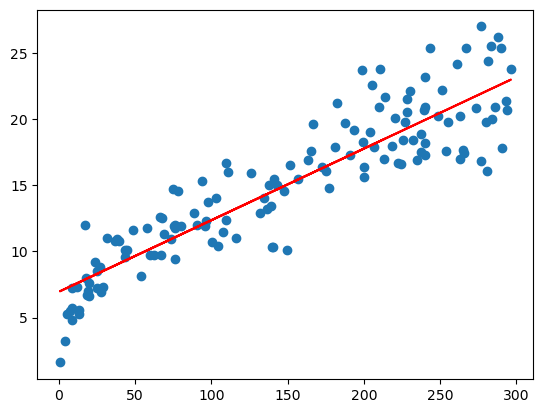

In [200]:
plt.scatter(x=x_train,y=y_train)
plt.plot(x_train,6.948+0.0541*x_train,'r')
plt.show()

In [164]:
x_test=np.array(x_test).reshape(-1,1)

In [166]:
y_test=np.array(y_test).reshape(-1,1)

In [228]:
y_pred=model.predict(x_test)

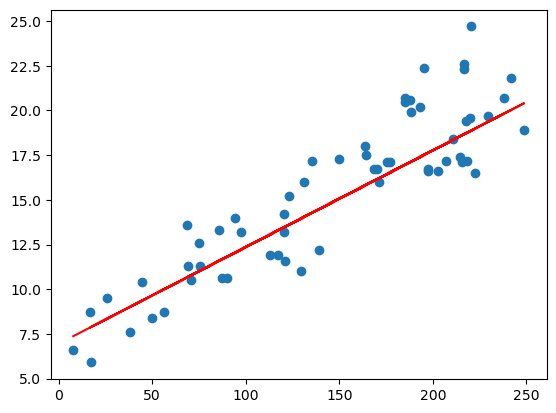

In [238]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.948+0.0541*x_test,'r')
plt.show()

- #### Model Evaluation 

In [243]:
 from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [247]:
# mean squared error
MSE=mean_squared_error(y_test,y_pred)
print(f'MSE={MSE}')
print(f'RMSE={np.sqrt(MSE)}')

MSE=3.6668947461406862
RMSE=1.9149137698968814


In [252]:
r_squared = r2_score(y_test, y_pred)
print(f'r2={r_squared}')

r2=0.813041007809068
